In [7]:
import numpy as np
from scipy.linalg import lu

In [8]:
A = np.array(
    [[2,3,1,-11,1],
    [5,-2,5,-4,5],
    [1,-1,3,-3,3],
    [3,4,-7,2,-7]]
)
pl, u = lu(A, permute_l=True)

In [11]:
np.linalg.matrix_rank(A)

3

In [9]:
pl

array([[ 0.4       ,  0.73076923,  1.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ,  0.        ],
       [ 0.2       , -0.11538462,  0.13414634,  1.        ],
       [ 0.6       ,  1.        ,  0.        ,  0.        ]])

In [10]:
u

array([[ 5.00000000e+00, -2.00000000e+00,  5.00000000e+00,
        -4.00000000e+00,  5.00000000e+00],
       [ 0.00000000e+00,  5.20000000e+00, -1.00000000e+01,
         4.40000000e+00, -1.00000000e+01],
       [ 0.00000000e+00,  0.00000000e+00,  6.30769231e+00,
        -1.26153846e+01,  6.30769231e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         5.42821989e-16,  0.00000000e+00]])

In [27]:
aug = np.array([
    [1,2,3,4],
    [2,3,4,5],
    [3,4,5,6],
    [4,5,6,7],
])

aug2 = np.array([
    [1,1/2,1/3,1/4],
    [1/2,1/3,1/4,1/5],
    [1/3,1/4,1/5,1/6],
    [1/4,1/5,1/6,1/7],
])

np.linalg.matrix_rank(aug2)

4

In [23]:
q9 = np.array([
    [1,2],
    [3,4]
])

q9_2 = np.array([
    [1,2,3],
    [4,5,6],
    [7,8,9],
])

np.linalg.matrix_rank(q9_2)

2

In [32]:
q6 = np.array([
    [2,3,1,-11,1],
    [5,-2,5,-4,5],
    [1,-1,3,-3,3],
    [3,4,-7,2,-7],
])

aug = np.array([
    [1,2,3],
    [2,3,4],
    [3,4,5],
    [4,5,6],
])

q6_b = np.array([4,5,6,7])

# np.linalg.solve(aug,q6_b)
np.linalg.matrix_rank(q6)

3

In [24]:

q9_2 = np.array([
    [2,3,1,-11,1],
    [5,-2,5,-4,5],
    [1,-1,3,-3,3],
    [3,4,-7,2,-7],
])

np.linalg.matrix_rank(q9_2)

3

In [35]:
# circuit problem

aug = np.array([
    [-1, 1, 1],
    [4, 12, 0],
    [0, 12, 8]
])

q6_b = np.array([0,12,24])

np.linalg.solve(aug,q6_b)

array([2.14285714, 1.71428571, 0.42857143])

In [31]:
import numpy as np

# Define the matrix A
A = np.array([[1j, 1 + 1j],
              [-1 + 1j, 0]])

# Calculate the eigenvalues and eigenvectors of A
eigenvalues, eigenvectors = np.linalg.eig(A)

# Check if 2i is an eigenvalue
is_2i_eigenvalue = np.isclose(eigenvalues, 2j).any()

# Preparing the potential eigenvectors to verify
v1 = np.array([[-1 + 1j], [1/2]])
v2 = np.array([[2], [1 + 1j]])

# Check if v1 and v2 are eigenvectors and if they correspond to the given eigenvalues
is_v1_eigenvector = np.allclose(A @ v1, eigenvalues[0] * v1) or np.allclose(A @ v1, eigenvalues[1] * v1)
is_v2_eigenvector_for_minus_i = np.allclose(A @ v2, -1j * v2)

# Check if A is skew-Hermitian (A† = -A)
is_skew_hermitian = np.allclose(A.conj().T, -A)

# Check if A is unitary (A†A = I)
is_unitary = np.allclose(A.conj().T @ A, np.eye(2))

eigenvalues, is_2i_eigenvalue, is_v1_eigenvector, is_v2_eigenvector_for_minus_i, is_skew_hermitian, is_unitary


(array([ 2.22044605e-16+2.j, -1.38777878e-16-1.j]),
 True,
 False,
 False,
 True,
 False)

In [32]:
A.conj().T

array([[ 0.-1.j, -1.-1.j],
       [ 1.-1.j,  0.-0.j]])

In [33]:
A.conj().T @ A

array([[3.+0.j, 1.-1.j],
       [1.+1.j, 2.+0.j]])

In [8]:
from sympy import symbols, cos, sin, I, Matrix, solve

# Define the symbol for theta
theta = symbols('theta')

# Define the matrix A
A = Matrix([[cos(theta), -sin(theta)], [sin(theta), cos(theta)]])

# Calculate the characteristic polynomial of A and solve for lambda (eigenvalues)
char_poly = A.charpoly().as_expr()
eigenvalues_expr = solve(char_poly, A.charpoly().gens[0])

# Check if the characteristic equation matches the given one
given_char_eq = (cos(theta) - A.charpoly().gens[0])**2 + sin(theta)**2
matches_given_char_eq = char_poly.equals(given_char_eq)

# Check if the eigenvalues are as stated
stated_eigenvalues = [sin(theta) + I*cos(theta), sin(theta) - I*cos(theta)]
eigenvalues_match_stated = [eigval.equals(stated_eigenvalues[0]) or eigval.equals(stated_eigenvalues[1]) for eigval in eigenvalues_expr]

# Calculate the eigenvectors
eigenvectors = A.eigenvects()

# Given eigenvectors to compare
given_eigenvectors = [Matrix([[1], [I]]), Matrix([[1], [-I]])]

# Check if the calculated eigenvectors match the given ones
eigenvectors_match_given = []
for evects in eigenvectors:
    for evect in evects[2]:
        normalized_evect = evect.normalized()
        # Check if the normalized eigenvector matches either of the given eigenvectors
        if any(normalized_evect.equals(ge) for ge in given_eigenvectors):
            eigenvectors_match_given.append(True)
        else:
            eigenvectors_match_given.append(False)

char_poly, eigenvalues_expr, matches_given_char_eq, all(eigenvalues_match_stated), eigenvectors_match_given


(lambda**2 - 2*lambda*cos(theta) + 1,
 [-sqrt(-sin(theta)**2) + cos(theta), sqrt(-sin(theta)**2) + cos(theta)],
 True,
 False,
 [False, False])

In [15]:
[list(tup[2][0]) for tup in A.eigenvects()]

[[sin(theta)/sqrt(cos(theta)**2 - 1), 1],
 [-sin(theta)/sqrt(cos(theta)**2 - 1), 1]]

In [17]:
A = np.array([[1, 0,],
              [2, -1]])

P = np.array([[7, -5,],
              [10, -7]])

A_hat = np.linalg.inv(P) @ A @ P
A_hat

array([[-29.,  20.],
       [-42.,  29.]])

In [22]:
np.linalg.eig(A)[1]

array([[0.        , 0.70710678],
       [1.        , 0.70710678]])

In [28]:
A @ np.array([0, 1]) == P @ np.array([5, 7])

array([ True, False])

In [24]:
A @ np.array([1, 1])

array([1, 1])

In [29]:
P @ np.array([5, 7])

array([0, 1])

In [30]:
X = np.array([[1,0],
              [1,1]])

np.linalg.inv(X)

array([[ 1.,  0.],
       [-1.,  1.]])

In [34]:
X = np.array([[0,0],
              [0,0]])

np.linalg.eig(X)

EigResult(eigenvalues=array([0., 0.]), eigenvectors=array([[1., 0.],
       [0., 1.]]))

In [5]:
from sympy import solve, cos, var

var = z
# We'll re-evaluate the expression and ensure the correct calculation is done for positive real and imaginary parts
# Calculate the solutions for cos(z) = 5
solution_set = solve(cos(z) - 5, z)

# Cosine is periodic with a period of 2*pi, so we should add multiples of 2*pi to find all solutions
# Since we want the solutions for n=1, we consider 2*pi*1
n = 1
solutions_n1 = [sol + 2*pi*n*I for sol in solution_set]

# Now we filter out the solutions that have positive real and imaginary parts
positive_solutions_n1 = [sol for sol in solutions_n1 if re(sol) > 0 and im(sol) > 0]

# If there are any solutions that meet the criteria, we calculate their magnitude
if positive_solutions_n1:
    # We take the first solution as they will all have the same magnitude
    modulus_positive_solution_n1 = Abs(positive_solutions_n1[0]).evalf(3)
else:
    modulus_positive_solution_n1 = "No solution with positive real and imaginary parts for n=1."

modulus_positive_solution_n1


NameError: name 'z' is not defined

In [5]:
# Sympy is used for symbolic calculation in Python
from sympy import symbols, I, re, integrate, Abs

# Define the variable
t = symbols('t', real=True)

# Define the parameterized paths for each segment
segment1_z = I * t
segment2_z = 1 + I * t
segment3_z = 1 + I * (1 - t)
segment4_z = 1 - t

# Compute dz for each segment
segment1_dz = I
segment2_dz = I
segment3_dz = -I
segment4_dz = -1

# Compute the real part of z^2 for each segment
segment1_Re_z2 = re(segment1_z**2)
segment2_Re_z2 = re(segment2_z**2)
segment3_Re_z2 = re(segment3_z**2)
segment4_Re_z2 = re(segment4_z**2)

# Calculate the integral for each segment
segment1_integral = integrate(segment1_Re_z2 * segment1_dz, (t, 0, 1))
segment2_integral = integrate(segment2_Re_z2 * segment2_dz, (t, 0, 1))
segment3_integral = integrate(segment3_Re_z2 * segment3_dz, (t, 0, 1))
segment4_integral = integrate(segment4_Re_z2 * segment4_dz, (t, 0, 1))

# Sum the integrals for all segments to get the total integral
total_integral = segment1_integral + segment2_integral + segment3_integral + segment4_integral

# Calculate the magnitude (absolute value) of the total integral
magnitude = Abs(total_integral)

# Evaluate the magnitude to three decimal places
magnitude_value = magnitude.evalf(3)
magnitude_value


0.471

In [7]:
from sympy import symbols, integrate, I, re

# Define the variable for t, which will be used to parameterize the parabola
t = symbols('t')

# Parameterize the parabola
z_t = t + I * (1 + 1/2 * (t - 1)**2)
dz_t = z_t.diff(t)

# The real part of z squared
Re_z_squared = re(z_t)

# Integral of the real part of z squared times dz over the parabola
integral = integrate(Re_z_squared * dz_t, (t, 1, 3))

# Compute the magnitude (absolute value) of the integral
magnitude = abs(integral)

# Evaluate the magnitude to three decimal places
magnitude_value = magnitude.evalf(4)
magnitude_value


6.146

In [12]:
from sympy import symbols, limit, pi

# Define the symbol for z
z = symbols('z')

# Define the function f(z)
f_z = z**2 / (z + 1)

# Compute the residue of f(z) at z=1
residue_at_1 = limit(f_z, z, 1)

# Calculate the integral using Cauchy's integral formula (the integral is 2*pi*i times the residue)
integral_value = 2 * pi * I * residue_at_1

# Compute the magnitude of the integral
magnitude = abs(integral_value)

# Evaluate the magnitude to three decimal places
magnitude_value = magnitude.evalf(5)
residue_at_1, magnitude_value


(1/2, 3.1416)

In [14]:
from sympy import symbols, I, sin, pi, limit, Abs

# Define the complex variable
z = symbols('z')

# Define the function to integrate
f = sin(z) / (4*z*(z - 2*I))

# Calculate the residue at z=0
residue_at_0 = limit(z * f, z, 0)

# Calculate the residue at z=2i
residue_at_2i = limit((z - 2*I) * f, z, 2*I)

# The integral over the contour is 2*pi*I times the sum of the residues inside the contour
# The residue at z=0 is taken with a negative sign because the contour around the inner square is clockwise
integral_over_contour = 2 * pi * I * (residue_at_2i - residue_at_0)

# Calculate the magnitude of the integral
magnitude = Abs(integral_over_contour)

# Evaluate the magnitude to three decimal places
magnitude_value = magnitude.evalf(4)

print(f"Residue at z=0: {residue_at_0}")
print(f"Residue at z=2i: {residue_at_2i}")
print(f"Integral over contour: {integral_over_contour}")
print(f"Magnitude of integral: {magnitude_value}")


Residue at z=0: 0
Residue at z=2i: sinh(2)/8
Integral over contour: I*pi*sinh(2)/4
Magnitude of integral: 2.849


In [22]:
from sympy import symbols, integrate, I

# Define the symbols
x, y = symbols('x y', real=True)

# Define the integrals for each segment
# Segment 1: from 0 to 2 (along the real axis)
segment1 = integrate(2*x**2, (x, 0, 2))

# Segment 2: from 2 to 2 + 2i (upwards along the imaginary axis)
segment2 = integrate(2*(-y**2)*I, (y, 0, 2))

# Sum the integrals to find the total integral
total_integral = segment1 + segment2

# Calculate the magnitude of the total integral
magnitude = abs(total_integral)

# Evaluate the magnitude to three decimal places
magnitude_value = magnitude.evalf(10)
magnitude_value


7.542472333

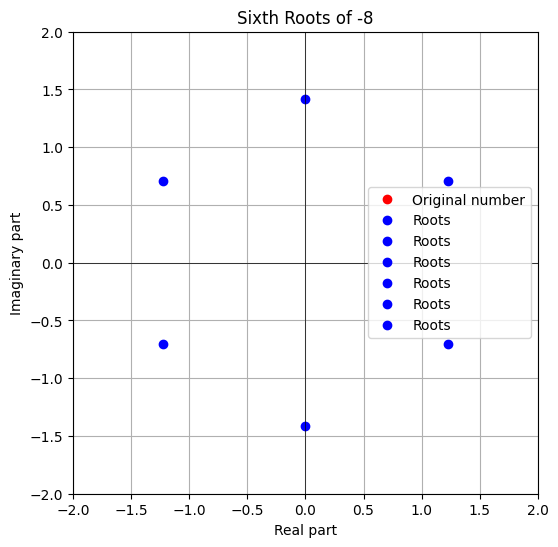

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# The complex number z for which we find the sixth roots
z = -8

# Convert to polar form
r = abs(z)  # Modulus
theta = np.angle(z)  # Argument

# Calculate the modulus and argument of the sixth roots
r_root = r**(1/6)  # Sixth root of the modulus of z
theta_roots = [(theta + 2*np.pi*k)/6 for k in range(6)]  # Sixth roots of the argument of z

# Calculate the sixth roots in rectangular form (a + bi)
roots = [r_root * (np.cos(t) + np.sin(t)*1j) for t in theta_roots]

# Plotting
fig, ax = plt.subplots(figsize=(6, 6))

# Plot the original number
ax.plot(np.real(z), np.imag(z), 'ro', label='Original number')

# Plot the roots
for root in roots:
    ax.plot(np.real(root), np.imag(root), 'bo', label='Roots' if 'Roots' not in ax.get_label() else "")

# Set equal scaling and labels
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.grid(True, which='both')

# Set the labels and title
ax.set_xlabel('Real part')
ax.set_ylabel('Imaginary part')
ax.set_title('Sixth Roots of -8')

# Set the x and y axis limits
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])

# Add a legend
ax.legend()

# Show the plot
plt.show()


In [24]:
roots

[(1.224744871391589+0.7071067811865474j),
 (8.659560562354932e-17+1.414213562373095j),
 (-1.224744871391589+0.7071067811865474j),
 (-1.2247448713915892-0.707106781186547j),
 (-2.5978681687064796e-16-1.414213562373095j),
 (1.2247448713915885-0.7071067811865481j)]

In [26]:
from sympy import symbols, integrate, I, re

# Define the variable
t = symbols('t', real=True)

# Set up the integrals for each segment of the path
# Segment from 0 to i
integrand1 = re((I*t)**2) * I
integral1 = integrate(integrand1, (t, 0, 1))

# Segment from i to 1+i
integrand2 = re((1 + I*t)**2) * I
integral2 = integrate(integrand2, (t, 0, 1))

# Segment from 1+i to 1
integrand3 = re((1 + I*(1-t))**2) * (-I)
integral3 = integrate(integrand3, (t, 0, 1))

# Segment from 1 to 0
integrand4 = re(t**2)
integral4 = integrate(integrand4, (t, 1, 0))

# The total integral is the sum of the integrals over the four segments
total_integral = integral1 + integral2 + integral3 + integral4

# Calculate the magnitude of the total integral
magnitude_total_integral = abs(total_integral)

# Evaluate the magnitude to three decimal places
magnitude_value = magnitude_total_integral.evalf(4)
magnitude_value


0.4714